### Basic library imports

In [2]:
import os
import pandas as pd

### Read Dataset

In [3]:
DATASET_FOLDER = '../dataset/'
train = pd.read_csv(os.path.join(DATASET_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATASET_FOLDER, 'test.csv'))
sample_test = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test.csv'))
sample_test_out = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test_out.csv'))

In [30]:
new_train_data = pd.read_excel(os.path.join(DATASET_FOLDER, 'new_sample_train.xls.xlsx'))

### Run Sanity check using src/sanity.py

In [4]:
!python sanity.py --test_filename ../dataset/sample_test.csv --output_filename ../dataset/sample_test_out.csv

Parsing successfull for file: ../dataset/sample_test_out.csv


In [5]:
!python sanity.py --test_filename ../dataset/sample_test.csv --output_filename ../dataset/sample_test_out_fail.csv

Error: Invalid unit [lbs] found in 6.75 lbs. Allowed units: {'quart', 'microlitre', 'kilogram', 'watt', 'gram', 'pint', 'volt', 'cup', 'decilitre', 'centimetre', 'gallon', 'litre', 'centilitre', 'kilowatt', 'milligram', 'imperial gallon', 'pound', 'fluid ounce', 'millivolt', 'foot', 'ton', 'inch', 'kilovolt', 'cubic foot', 'yard', 'cubic inch', 'millilitre', 'metre', 'ounce', 'microgram', 'millimetre'}


### Download images

In [11]:
from utils import download_images
download_images(sample_test['image_link'], '../images', max_threads=30)

TypeError: download_images() got an unexpected keyword argument 'max_threads'

In [31]:
import requests
import os
from multiprocessing.pool import ThreadPool

# Define your own download_images function
def download_image(image_url, save_dir):
    try:
        response = requests.get(image_url, stream=True)
        if response.status_code == 200:
            image_name = image_url.split('/')[-1]
            image_path = os.path.join(save_dir, image_name)
            
            with open(image_path, 'wb') as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)
            print(f"Downloaded: {image_name}")
        else:
            print(f"Failed to download: {image_url}")
    except Exception as e:
        print(f"Error downloading {image_url}: {e}")

def download_images(image_links, save_dir, max_threads=30):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    with ThreadPool(max_threads) as pool:
        pool.starmap(download_image, [(url, save_dir) for url in image_links])

# Example usage
image_links = new_train_data['image_link'].tolist()  # Converting image links to a list
download_images(image_links, '../images2', max_threads=30)


Downloaded: 31EvJszFVfL.jpg
Downloaded: 81S2+GnYpTL.jpg
Downloaded: 715vVcWJxGL.jpg
Downloaded: 617Tl40LOXL.jpg
Downloaded: 61BZ4zrjZXL.jpg
Downloaded: 81xsq6vf2qL.jpg
Downloaded: 71rKXZJrh4L.jpg
Downloaded: 71YyZ2iPyZL.jpg
Downloaded: 61WFh8RCQYL.jpg
Downloaded: 61hWZdkq6WL.jpg
Downloaded: 61HXgujoxpL.jpg
Downloaded: 61x6RSjwQIL.jpg
Downloaded: 51WsuKKAVrL.jpg
Downloaded: 61c+hSNnnZL.jpg
Downloaded: 71IUuTJ8QwL.jpg
Downloaded: 81dzao1Ob4L.jpg
Downloaded: 71cjrYndwIL.jpg
Downloaded: 71004c9tzfL.jpg
Downloaded: 81RNsNEM1EL.jpg
Downloaded: 91Cma3RzseL.jpg
Downloaded: 61sQ+qAKr4L.jpg
Downloaded: 81N73b5khVL.jpg
Downloaded: 61I9XdN6OFL.jpg
Downloaded: 61sx0ezNNLL.jpg
Downloaded: 41wvffSxB4L.jpg
Downloaded: 61o2ntPNNgL.jpg
Downloaded: 71+fn9TWQmL.jpg
Downloaded: 817vo3DcCNL.jpg
Downloaded: 91LPf6OjV9L.jpg
Downloaded: 71nywfWZUwL.jpg
Downloaded: 61wzlucTREL.jpg
Downloaded: 613v+2W4UwL.jpg
Downloaded: 81e2YtCOKvL.jpg
Downloaded: 61QsBSE7jgL.jpg
Downloaded: 613BeFNwHcL.jpg
Downloaded: 91-iahVG

In [6]:
assert len(os.listdir('../images')) > 0

In [7]:
rm -rf ../images

SyntaxError: invalid syntax (2680334662.py, line 1)

In [13]:
print(train.head())


                                          image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   

     entity_value  
0      500.0 gram  
1         1.0 cup  
2      0.709 gram  
3      0.709 gram  
4  1400 milligram  


<Axes: >

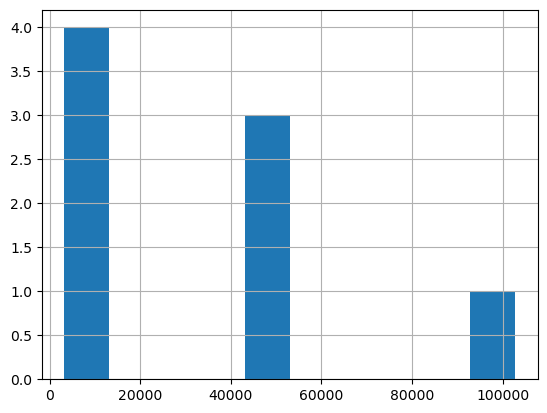

In [18]:
train.entity_name.value_counts().hist()

In [28]:
train[['group_id','entity_name','entity_value']].drop_duplicates()

,group_id,entity_name,entity_value
0,748919,item_weight,500.0 gram
1,916768,item_volume,1.0 cup
2,459516,item_weight,0.709 gram
4,731432,item_weight,1400 milligram
10,149159,item_weight,30.0 kilogram
...,...,...,...
263851,955522,height,99.0 millimetre
263852,115666,height,38.0 inch
263853,488883,height,72.0 centimetre
263856,204245,height,43.2 centimetre


In [20]:
import matplotlib.pyplot as plt
# plt.hist(train)
train.isna().sum()

image_link      0
group_id        0
entity_name     0
entity_value    0
dtype: int64